In [39]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from quilt.data.ResidentMario import geoplot_data
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd
from shapely.geometry import Point

In [2]:
# Import cleaned dataset
fatalities_df = pd.read_csv('raw_data/Police Fatalities.csv', encoding = "ISO-8859-1")

In [3]:
# Look at the top few rows of the data frame
fatalities_df.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


In [4]:
# Create a new column for year so that we can aggregate by year
years = []

for dt in fatalities_df["Date"]:
    conv_dt = datetime.strptime(dt, '%m/%d/%Y')
    
    years.append(conv_dt.year)
    
fatalities_df["Year"] = years

In [5]:
fatalities_df.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Year
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,2000
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,2000
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,2000
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,2001
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,2001


In [171]:
grouped_df = fatalities_df.loc[(fatalities_df["Armed"] == "Gun") | (fatalities_df["Armed"] == "Knife"), :].groupby("Year")

shootings_by_year = grouped_df["Name"].count().reset_index()

In [172]:
grouped_df = fatalities_df.loc[(fatalities_df["Armed"] != "Gun") & (fatalities_df["Armed"] != "Knife"), :].groupby("Year")

unarmed_shootings_by_year = grouped_df["Name"].count().reset_index()

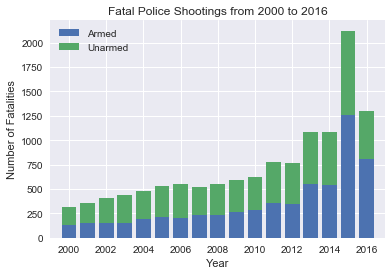

In [178]:
# Plot the number of fatalities by year
p1 = plt.bar(x = shootings_by_year["Year"], height = shootings_by_year["Name"], align = "center")
p2 = plt.bar(x = unarmed_shootings_by_year["Year"], height = unarmed_shootings_by_year["Name"],
       bottom = shootings_by_year["Name"], align = "center")


# Add labels
plt.title("Fatal Police Shootings from 2000 to 2016")
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.legend((p1[0], p2[0]), ('Armed', 'Unarmed'))

# Set x limits
plt.xlim(1999,2017)


sns.set()

plt.show()

In [ ]:
lats = []
lngs = []

for index, row in fatalities_df.iterrows():

    target_city = f"{row['City']}, {row['State']}"

    target_url = "https://maps.googleapis.com/maps/api/geocode/json?" \
        "address=%s&key=%s" % (target_city, gkey)

    response = requests.get(target_url).json()
    
    try:
        lat = response['results'][0]['geometry']['location']['lat']
        lng = response['results'][0]['geometry']['location']['lng']    
        lats.append(lat)
        lats.append(lng)
    except IndexError:
        lat = np.nan
        lng = np.nan  
        lats.append(lat)
        lats.append(lng)    

In [175]:
grouped_df = fatalities_df.groupby("State")

shootings_by_state = grouped_df["Name"].count().reset_index()

shootings_by_state.head()

,State,Name
0,AK,73
1,AL,326
2,AR,70
3,AZ,585
4,CA,2913


In [68]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [143]:
state_locs = pd.read_csv('raw_data/state_lat_long.csv', usecols=['state name', 'latitude', 'longitude'])

state_locs.head()

,state name,latitude,longitude
0,Alabama,32.7794,-86.8287
1,Alaska,64.0685,-52.2782
2,Arizona,34.2744,-11.6602
3,Arkansas,34.8938,-92.4426
4,California,37.1841,-19.4696


In [144]:
tracking_list = []

for index, row in shootings_by_state.iterrows():
    state = states[row['State']]
    tracking_list.append(state)
    
shootings_by_state['state name'] = tracking_list

shootings_by_state.head()

,State,Name,state name
0,AK,73,Alaska
1,AL,326,Alabama
2,AR,70,Arkansas
3,AZ,585,Arizona
4,CA,2913,California


In [147]:
merged_df = pd.merge(shootings_by_state, state_locs, on="state name")

merged_df = merged_df.rename(columns={"Name": "Fatalities"})

merged_df = merged_df[["state name", "Fatalities", "latitude", "longitude"]]

merged_df.head()

,state name,Fatalities,latitude,longitude
0,Alaska,73,64.0685,-52.2782
1,Alabama,326,32.7794,-86.8287
2,Arkansas,70,34.8938,-92.4426
3,Arizona,585,34.2744,-11.6602
4,California,2913,37.1841,-19.4696


In [148]:
geometry = [Point(xy) for xy in zip(merged_df.longitude, merged_df.latitude)]
merged_df = merged_df.drop(['longitude', 'latitude'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(merged_df, crs=crs, geometry=geometry)

gdf.head()

,state name,Fatalities,geometry
0,Alaska,73,POINT (-52.2782 64.0685)
1,Alabama,326,POINT (-86.8287 32.7794)
2,Arkansas,70,POINT (-92.4426 34.8938)
3,Arizona,585,POINT (-11.6602 34.2744)
4,California,2913,POINT (-19.4696 37.1841)


In [152]:
gdf = gdf.loc[(gdf["state name"] != 'Alaska') & (gdf["state name"] != 'Hawaii')]

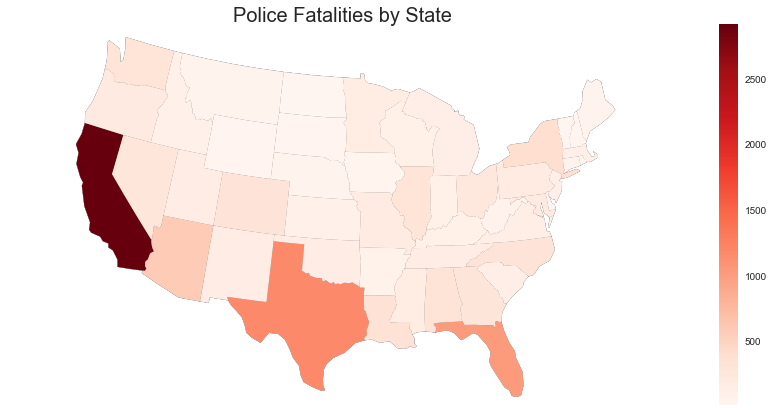

In [167]:
continental_usa = gpd.read_file(geoplot_data.contiguous_usa())
continental_usa = continental_usa.set_index("State")

ax = gplt.polyplot(continental_usa, projection=gcrs.AlbersEqualArea(), figsize = (15,7))

gplt.aggplot(gdf, projection=gcrs.AlbersEqualArea(), hue='Fatalities', cmap='Reds',
             by='state name', geometry=continental_usa.geometry, ax=ax,
             linewidth=0)

plt.title("Police Fatalities by State", size = 20)

plt.show()